In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv("../data/final.csv")
df.drop(["Unnamed: 0", 'birth year', 'date', 'starttime', 'stoptime'], inplace=True, axis=1)
df.head()

,tripduration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,gender,month,day,hour,dayofweek,Isweekday,age,ages
0,574,359,E 47 St & Park Ave,40.755103,-73.974987,528,2 Ave & E 31 St,40.742909,-73.977061,33216,Subscriber,1,1,30,17,3,1,27,20s
1,709,493,W 45 St & 6 Ave,40.756800,-73.982912,3159,W 67 St & Broadway,40.774925,-73.982666,16092,Subscriber,1,1,23,19,3,1,30,20s
2,1993,503,E 20 St & Park Ave,40.738274,-73.987520,3709,W 15 St & 6 Ave,40.738046,-73.996430,34868,Subscriber,1,1,26,18,6,0,43,40s
3,392,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,438,St Marks Pl & 1 Ave,40.727791,-73.985649,31405,Subscriber,1,1,5,18,6,0,24,20s
4,543,3496,1 Ave & E 110 St,40.792327,-73.938300,3671,E 81 St & 2 Ave,40.774779,-73.954275,35695,Subscriber,1,1,23,15,3,1,22,20s


In [3]:
df.isnull().sum()

tripduration               0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bikeid                     0
usertype                   0
gender                     0
month                      0
day                        0
hour                       0
dayofweek                  0
Isweekday                  0
age                        0
ages                       0
dtype: int64

# User Type Distriubution

In [4]:
user = df.groupby('usertype')['gender'].count()
user

usertype
Customer      143743
Subscriber    883824
Name: gender, dtype: int64

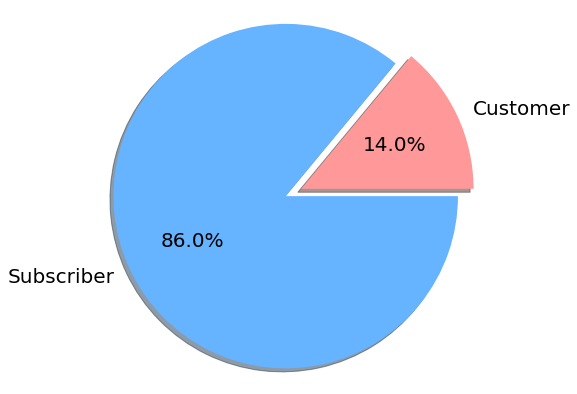

In [5]:
# pie chart of work
user = df.groupby('usertype')['gender'].count()
labels = ['Customer', 'Subscriber']
fig1, ax1 = plt.subplots(figsize=(7,7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
textprops = {"fontsize":20}
ax1.pie(user, labels=labels, colors=colors, explode=(0.1, 0), textprops=textprops, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

# Gender Distribution by User Type

In [6]:
user_gender_count = df.groupby(['usertype', 'gender'])['tripduration'].count().reset_index()
user_gender_count

,usertype,gender,tripduration
0,Customer,0,62415
1,Customer,1,52243
2,Customer,2,29085
3,Subscriber,0,16230
4,Subscriber,1,649415
5,Subscriber,2,218179


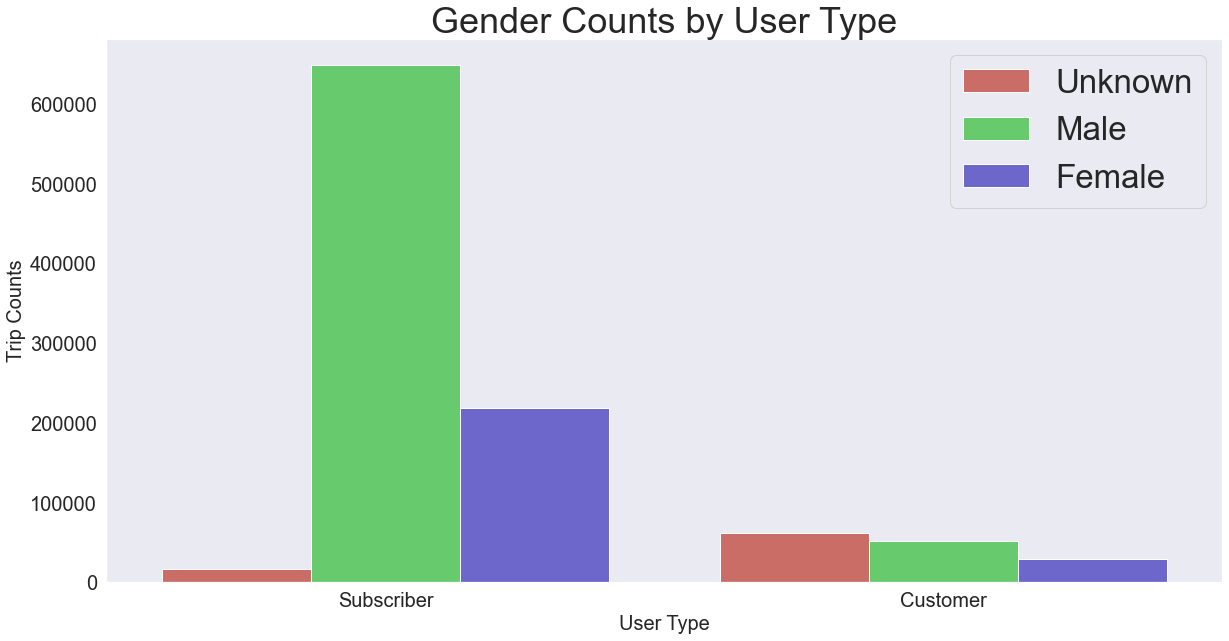

In [7]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=3)
plt.title("Gender Counts by User Type")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.barplot(x = 'usertype', y = 'tripduration', hue = 'gender', order = ['Subscriber', 'Customer'], data = user_gender_count, palette = 'hls')
ax.set(xlabel = "User Type", ylabel = "Trip Counts")
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Unknown', "Male", "Female"])
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)
plt.show()

**There are an overwhelming number of males in the subscriber. All genders are similar numbers in customer. it is because the customer doesn't have to enter the information.**

In [8]:
user_gender_ratio = df.groupby(['usertype', 'gender'])['tripduration'].count().reset_index()
cus = user_gender_ratio[user_gender_ratio['usertype']=="Customer"]
cus_sum = cus['tripduration'].sum()
sub = user_gender_ratio[user_gender_ratio['usertype']=="Subscriber"]
sub_sum = sub['tripduration'].sum()
user_gender_ratio.loc[user_gender_ratio['usertype'] == "Customer", "trip_ratio"] = cus['tripduration'] / cus_sum*100
user_gender_ratio.loc[user_gender_ratio['usertype'] == "Subscriber", "trip_ratio"] = sub['tripduration'] / sub_sum*100
user_gender_ratio

,usertype,gender,tripduration,trip_ratio
0,Customer,0,62415,43.421245
1,Customer,1,52243,36.344726
2,Customer,2,29085,20.234029
3,Subscriber,0,16230,1.836338
4,Subscriber,1,649415,73.477864
5,Subscriber,2,218179,24.685797


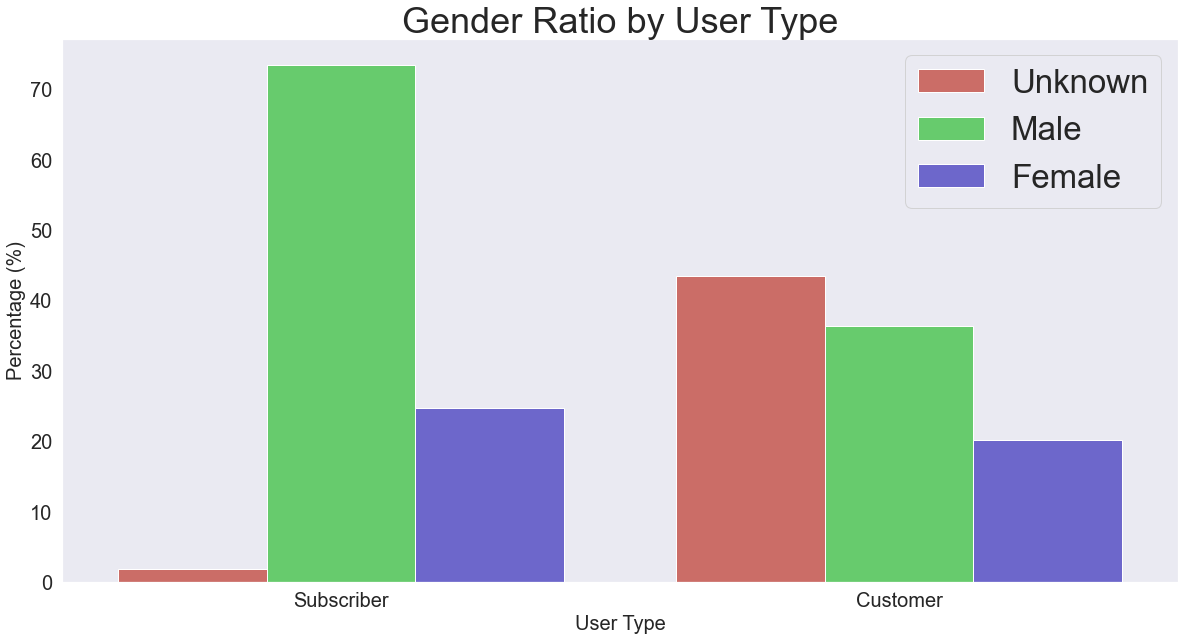

In [9]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=3)
plt.title("Gender Ratio by User Type")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.barplot(x = 'usertype', y = 'trip_ratio', hue = 'gender', order = ['Subscriber', 'Customer'], data = user_gender_ratio, palette = 'hls')
ax.set(xlabel = "User Type", ylabel = "Percentage (%)")
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Unknown', "Male", "Female"])
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)
plt.show()

In [10]:
df['gender'] = df['gender'].map({0: 'Unknown', 1: 'Male', 2: 'Female'})
gender_user = df.groupby(['gender', 'usertype'])['tripduration'].count().reset_index()
gender_user

,gender,usertype,tripduration
0,Female,Customer,29085
1,Female,Subscriber,218179
2,Male,Customer,52243
3,Male,Subscriber,649415
4,Unknown,Customer,62415
5,Unknown,Subscriber,16230


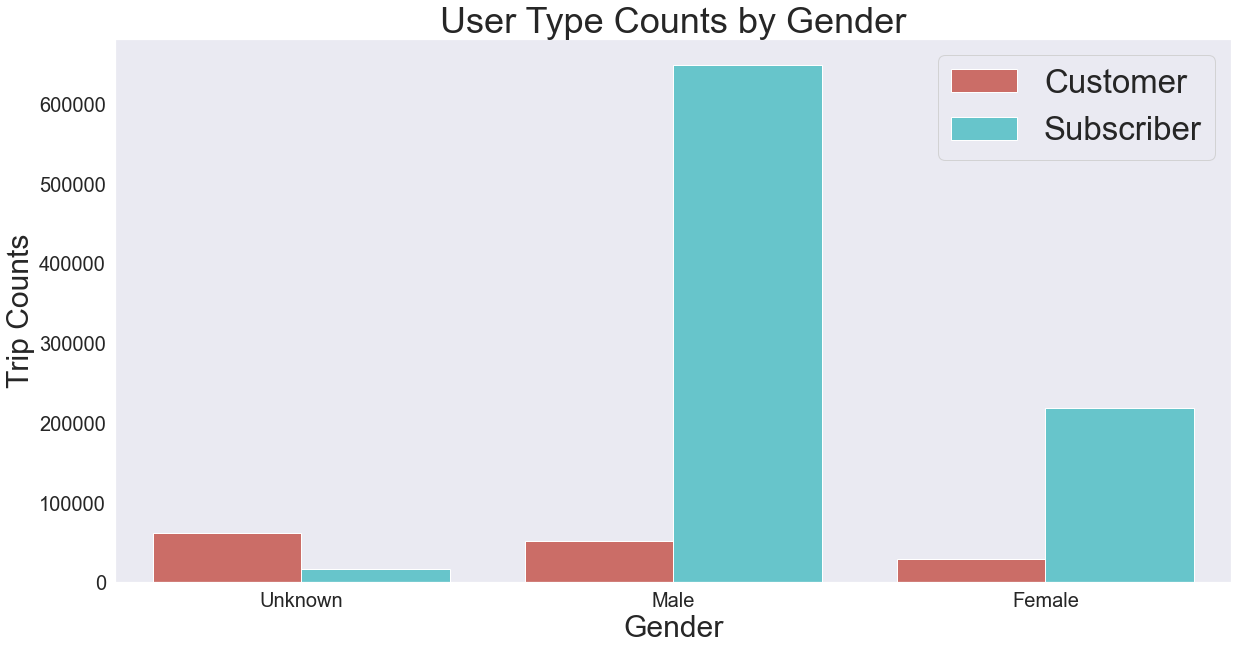

In [11]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=3)
plt.title("User Type Counts by Gender")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.barplot(x = 'gender', y = 'tripduration', hue = 'usertype', order = ['Unknown', 'Male', 'Female'], data = gender_user, palette = 'hls')
ax.set(xlabel = "Gender", ylabel = "Trip Counts")
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Customer', 'Subscriber'])
ax.xaxis.get_label().set_size(30)
ax.yaxis.get_label().set_size(30)
plt.show()

# Age Distribution by User Type

In [12]:
user_age = df.groupby(['usertype', 'ages']).count()[['tripduration']].reset_index()
user_age

,usertype,ages,tripduration
0,Customer,10s,4030
1,Customer,20s,38581
2,Customer,30s,24791
3,Customer,40s,8785
4,Customer,50s,66336
5,Customer,60s,1220
6,Subscriber,10s,7170
7,Subscriber,20s,229570
8,Subscriber,30s,291110
9,Subscriber,40s,165863


In [13]:
user_age_cust = user_age[user_age['usertype'] == "Customer"]
user_age_cust

,usertype,ages,tripduration
0,Customer,10s,4030
1,Customer,20s,38581
2,Customer,30s,24791
3,Customer,40s,8785
4,Customer,50s,66336
5,Customer,60s,1220


In [14]:
user_age_sub = user_age[user_age['usertype'] == "Subscriber"]
user_age_sub

,usertype,ages,tripduration
6,Subscriber,10s,7170
7,Subscriber,20s,229570
8,Subscriber,30s,291110
9,Subscriber,40s,165863
10,Subscriber,50s,133348
11,Subscriber,60s,56763


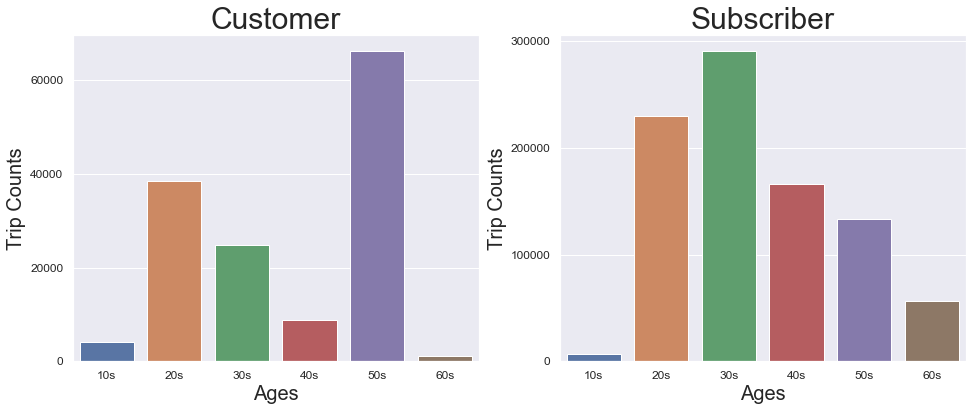

In [15]:
col_num = 2
row_num = 1
fig, axes = plt.subplots(row_num, col_num, figsize=(16, 6))

user_age_cust.columns = ['User Type', 'Ages', 'Trip Counts']
plt.subplot(1, 2, 1)
plt.title('Customer', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Ages', 'Trip Counts',data = user_age_cust)
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)

user_age_sub.columns = ['User Type', 'Ages', 'Trip Counts']
plt.subplot(1, 2, 2)
plt.title('Subscriber', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Ages', 'Trip Counts',data = user_age_sub)
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)

plt.show()

**The proportion of Subscribers in their 20s, 30s, and 40s was overwhelming. It is expected to be used a lot by people who need regular use, such as commuting.**

# Trip Duration by User Type

**TO DO:** find the better statistical plot (box plot) to use here, to see distribution continuous variable (trip duration) for different values of categorical variable (user type) 

**TO DO:** check if difference is statistically significant or not, need to statistical test get pvalue decide

In [16]:
user_trip = df.groupby('usertype').mean()[['tripduration']].reset_index()
user_trip

,usertype,tripduration
0,Customer,1984.513708
1,Subscriber,795.778489


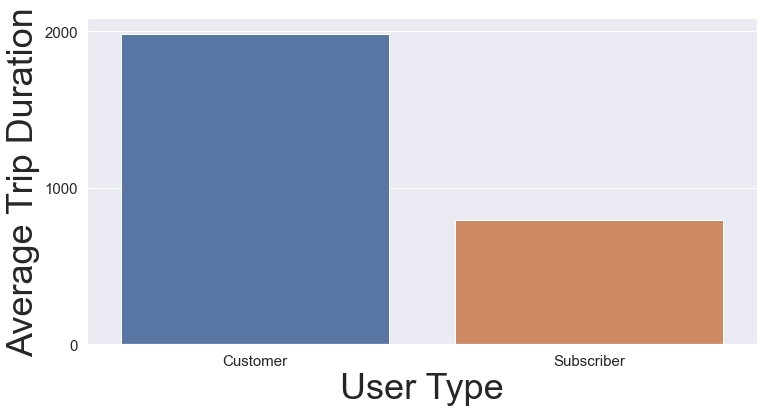

In [17]:
user_trip.columns=['User Type','Average Trip Duration']
plt.figure(figsize=(12,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.set_style('darkgrid')
sns.barplot('User Type','Average Trip Duration', data = user_trip);

In [18]:
user_tripduration = df[['usertype', 'tripduration']]
user_tripduration.reset_index()
user_tripduration

,usertype,tripduration
0,Subscriber,574
1,Subscriber,709
2,Subscriber,1993
3,Subscriber,392
4,Subscriber,543
...,...,...
1027562,Subscriber,542
1027563,Subscriber,162
1027564,Subscriber,1785
1027565,Subscriber,611


In [19]:
user_tripduration['log_trip'] = np.log(user_tripduration['tripduration'])
user_tripduration.drop("tripduration", inplace=True, axis=1)
user_tripduration

,usertype,log_trip
0,Subscriber,6.352629
1,Subscriber,6.563856
2,Subscriber,7.597396
3,Subscriber,5.971262
4,Subscriber,6.297109
...,...,...
1027562,Subscriber,6.295266
1027563,Subscriber,5.087596
1027564,Subscriber,7.487174
1027565,Subscriber,6.415097


<AxesSubplot:xlabel='User Type', ylabel='Log Tripduration'>

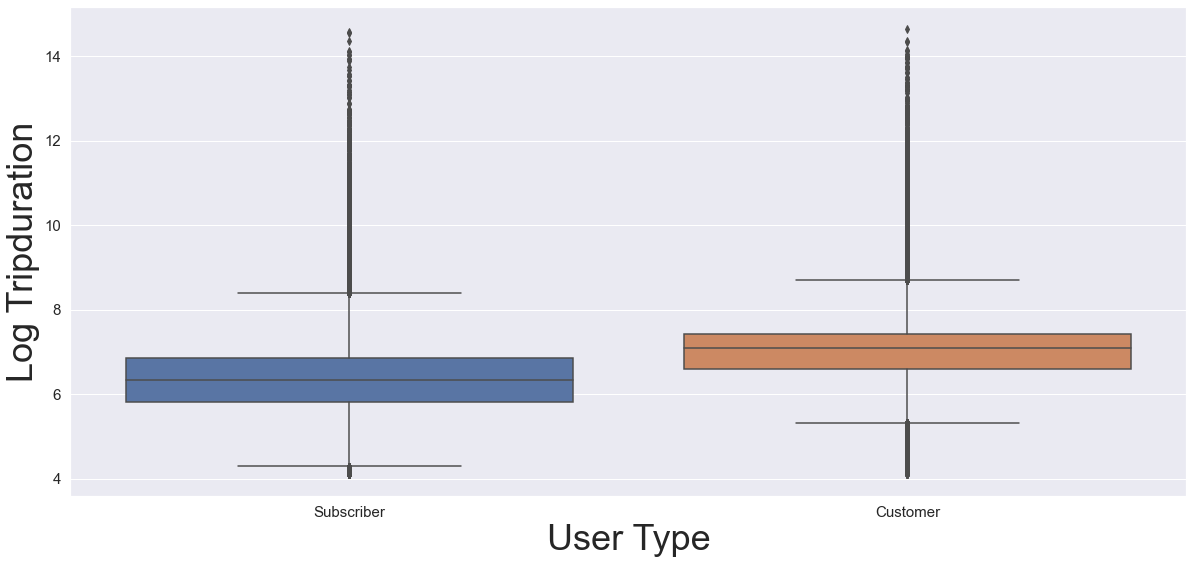

In [20]:
user_tripduration.columns=['User Type','Log Tripduration']
plt.figure(figsize=(20,9))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.boxplot(x='User Type', y='Log Tripduration', data=user_tripduration)

In [21]:
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [22]:
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [23]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

In [24]:
user_st = df[['usertype', 'tripduration']]
user_st['log_trip'] = np.log(user_st['tripduration'])
cust = user_st[user_st['usertype']=="Customer"]
cust = np.array(cust['log_trip'])
sub = user_st[user_st['usertype']=="Subscriber"]
sub = np.array(sub['log_trip'])

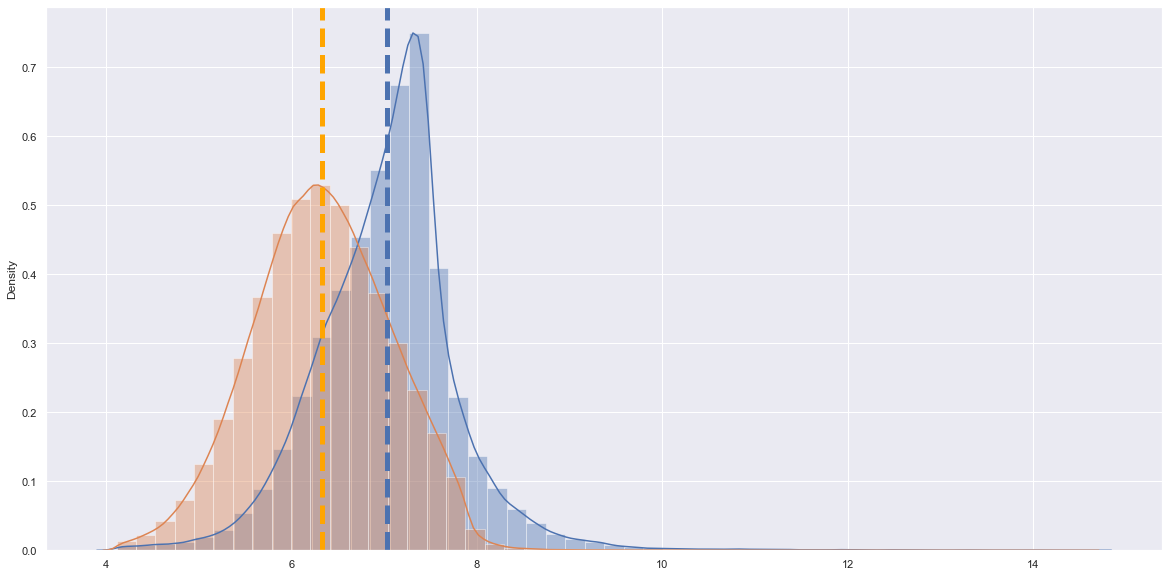

In [25]:
plt.figure()
ax1 = sns.distplot(cust)
ax2 = sns.distplot(sub)
plt.axvline(np.mean(cust), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(sub), color='orange', linestyle='dashed', linewidth=5)

In [26]:
def compare_2_groups(arr_1, arr_2, alpha):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [27]:
print(len(cust))
print(len(sub))

143743
883824


In [28]:
compare_2_groups(cust, sub, 0.05)

Statistics=329.331, p=0.000
Different distributions (reject H0)


# Most Popular Start Stations by User Type

In [29]:
user_start = df.groupby(['usertype', 'start_station_name']).count()['tripduration'].reset_index()

In [30]:
user_start_cust = user_start[user_start['usertype'] == "Customer"]
user_start_cust = user_start_cust.sort_values(by='tripduration', ascending=False)[1:11]
user_start_cust

,usertype,start_station_name,tripduration
113,Customer,5 Ave & E 88 St,1618
495,Customer,Grand Army Plaza & Central Park S,1575
21,Customer,12 Ave & W 40 St,1517
260,Customer,Centre St & Chambers St,1304
111,Customer,5 Ave & E 73 St,1282
256,Customer,Central Park West & W 72 St,1177
126,Customer,7 Ave & Central Park South,1176
206,Customer,Broadway & W 60 St,1161
879,Customer,West St & Chambers St,1111
676,Customer,Pier 40 - Hudson River Park,1111


In [31]:
user_start_sub = user_start[user_start['usertype'] == "Subscriber"]
user_start_sub = user_start_sub.sort_values(by='tripduration', ascending=False)[1:11]
user_start_sub

,usertype,start_station_name,tripduration
1033,Subscriber,8 Ave & W 31 St,5521
1265,Subscriber,E 17 St & Broadway,5496
1091,Subscriber,Broadway & E 14 St,5236
1092,Subscriber,Broadway & E 22 St,5219
1726,Subscriber,W 21 St & 6 Ave,5134
1168,Subscriber,Christopher St & Greenwich St,4399
1474,Subscriber,Lafayette St & E 8 St,4304
1034,Subscriber,8 Ave & W 33 St,4296
1800,Subscriber,West St & Chambers St,4058
1744,Subscriber,W 41 St & 8 Ave,4049


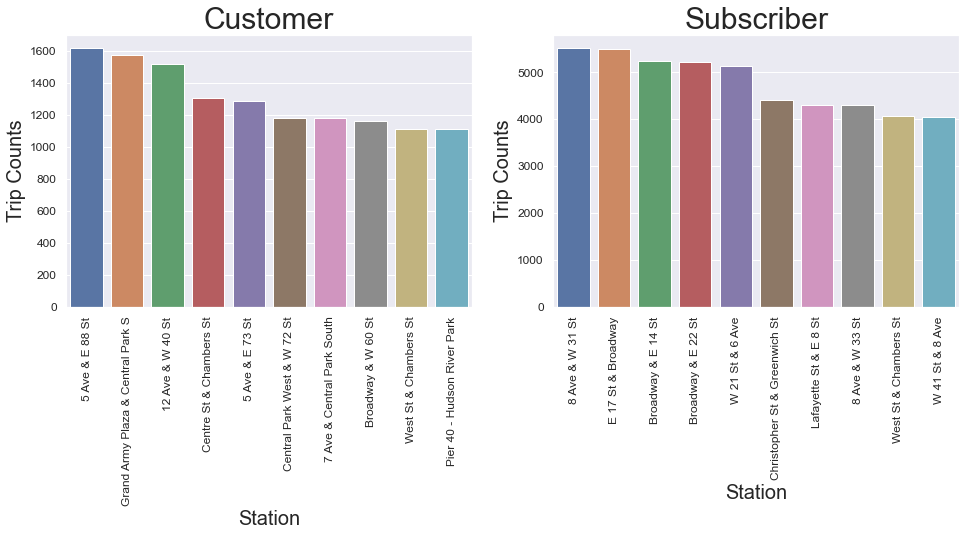

In [32]:
col_num = 2
row_num = 1
fig, axes = plt.subplots(row_num, col_num, figsize=(16, 5))

user_start_cust.columns = ['User Type', 'Station', 'Trip Counts']
plt.subplot(1, 2, 1)
plt.title('Customer', fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Station', 'Trip Counts',data = user_start_cust)
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)

user_start_sub.columns = ['User Type', 'Station', 'Trip Counts']
plt.subplot(1, 2, 2)
plt.title('Subscriber', fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Station', 'Trip Counts',data = user_start_sub)
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)

plt.show()

# Most Popular End Stations by User Type

In [33]:
user_end = df.groupby(['usertype', 'end_station_name']).count()['tripduration'].reset_index()

In [34]:
user_end_cust = user_end[user_end['usertype'] == "Customer"]
user_end_cust = user_end_cust.sort_values(by='tripduration', ascending=False)[1:11]
user_end_cust

,usertype,end_station_name,tripduration
251,Customer,Central Park S & 6 Ave,1672
260,Customer,Centre St & Chambers St,1467
22,Customer,12 Ave & W 40 St,1425
113,Customer,5 Ave & E 73 St,1405
881,Customer,West St & Chambers St,1360
256,Customer,Central Park West & W 72 St,1340
128,Customer,7 Ave & Central Park South,1306
209,Customer,Broadway & W 60 St,1214
677,Customer,Pier 40 - Hudson River Park,1175
818,Customer,W 34 St & 11 Ave,1101


In [35]:
user_end_sub = user_end[user_end['usertype'] == "Subscriber"]
user_end_sub = user_end_sub.sort_values(by='tripduration', ascending=False)[1:11]
user_end_sub

,usertype,end_station_name,tripduration
1095,Subscriber,Broadway & E 22 St,5686
1267,Subscriber,E 17 St & Broadway,5669
1036,Subscriber,8 Ave & W 31 St,5606
1094,Subscriber,Broadway & E 14 St,5211
1738,Subscriber,W 21 St & 6 Ave,5053
1170,Subscriber,Christopher St & Greenwich St,4498
1479,Subscriber,Lafayette St & E 8 St,4421
1812,Subscriber,West St & Chambers St,4338
1037,Subscriber,8 Ave & W 33 St,4222
1735,Subscriber,W 20 St & 11 Ave,4125


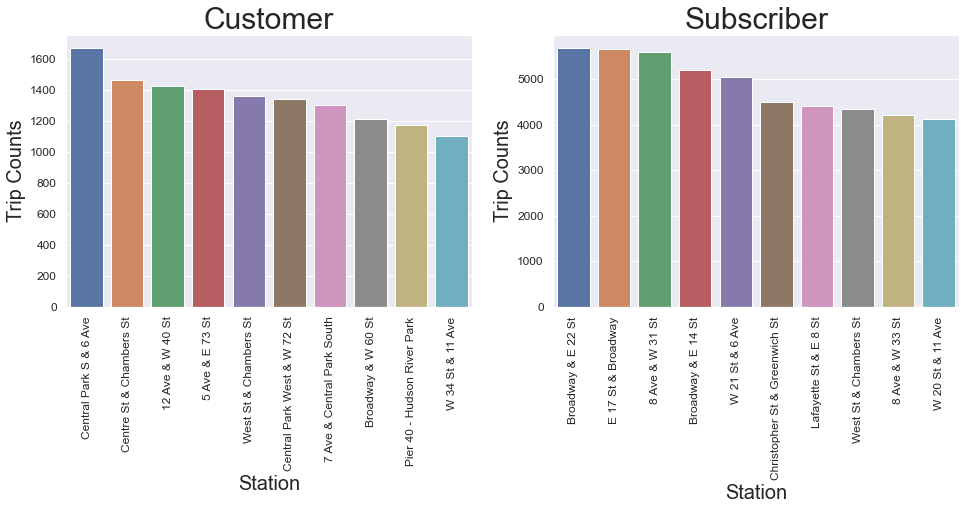

In [36]:
col_num = 2
row_num = 1
fig, axes = plt.subplots(row_num, col_num, figsize=(16, 5))

user_end_cust.columns = ['User Type', 'Station', 'Trip Counts']
plt.subplot(1, 2, 1)
plt.title('Customer', fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Station', 'Trip Counts',data = user_end_cust)
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)

user_end_sub.columns = ['User Type', 'Station', 'Trip Counts']
plt.subplot(1, 2, 2)
plt.title('Subscriber', fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Station', 'Trip Counts',data = user_end_sub)
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)

plt.show()

# Most Popular Hours by User Type

In [37]:
user_hour = df.groupby(['usertype', 'hour']).count()['tripduration'].reset_index()

In [38]:
user_hour_cust = user_hour[user_hour['usertype'] == "Customer"]
user_hour_cust = user_hour_cust.sort_values(by='tripduration', ascending=False)
user_hour_cust

,usertype,hour,tripduration
17,Customer,17,12874
15,Customer,15,12826
16,Customer,16,12688
14,Customer,14,12564
13,Customer,13,12009
18,Customer,18,11317
12,Customer,12,11086
11,Customer,11,9404
19,Customer,19,8749
10,Customer,10,7186


In [39]:
user_hour_sub = user_hour[user_hour['usertype'] == "Subscriber"]
user_hour_sub = user_hour_sub.sort_values(by='tripduration', ascending=False)
user_hour_sub

,usertype,hour,tripduration
41,Subscriber,17,87722
42,Subscriber,18,82837
32,Subscriber,8,77162
40,Subscriber,16,59893
33,Subscriber,9,59688
43,Subscriber,19,57296
39,Subscriber,15,50576
38,Subscriber,14,47549
37,Subscriber,13,46412
36,Subscriber,12,45202


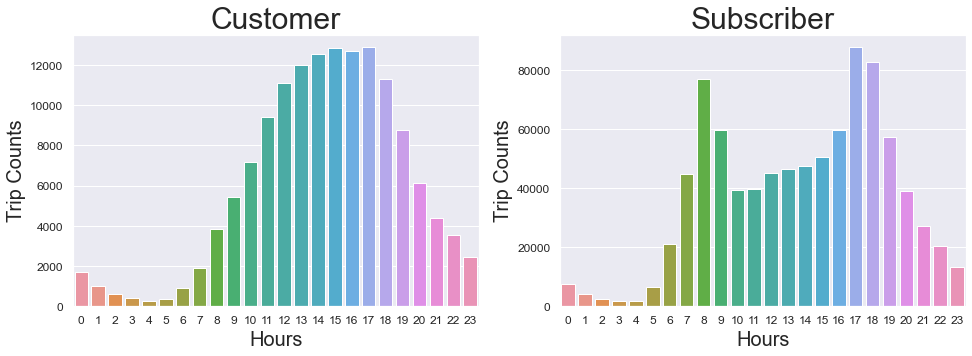

In [40]:
col_num = 2
row_num = 1
fig, axes = plt.subplots(row_num, col_num, figsize=(16, 5))

user_hour_cust.columns = ['User Type', 'Hours', 'Trip Counts']
plt.subplot(1, 2, 1)
plt.title('Customer', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Hours', 'Trip Counts',data = user_hour_cust)
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)

user_hour_sub.columns = ['User Type', 'Hours', 'Trip Counts']
plt.subplot(1, 2, 2)
plt.title('Subscriber', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Hours', 'Trip Counts',data = user_hour_sub)
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)

plt.show()

**Most customers are during the day, but most subscribers used during rush hour. Subscribers are expected to be used a lot for commuting.**

# Most Popular Start, End Stations by Subscribers in Rush Hours

In [41]:
user_start_comm = df[['usertype', 'start_station_name', 'hour']]
user_start_comm = user_start_comm[user_start_comm['hour'].apply(lambda x: x in {7, 8, 9, 16, 17, 18, 19 })]
user_start_comm = user_start_comm.groupby(['usertype', 'start_station_name']).count()['hour'].reset_index()

In [42]:
user_start_comm_sub = user_start_comm[user_start_comm['usertype'] == "Subscriber"]
user_start_comm_sub.sort_values(by='hour', ascending=False)[1:21]

,usertype,start_station_name,hour
1068,Subscriber,Broadway & E 22 St,3170
1009,Subscriber,8 Ave & W 31 St,2980
1268,Subscriber,E 47 St & Park Ave,2895
1238,Subscriber,E 17 St & Broadway,2777
1692,Subscriber,W 21 St & 6 Ave,2687
1142,Subscriber,Christopher St & Greenwich St,2551
1766,Subscriber,West St & Chambers St,2476
1067,Subscriber,Broadway & E 14 St,2461
1010,Subscriber,8 Ave & W 33 St,2404
1701,Subscriber,W 31 St & 7 Ave,2343


In [43]:
user_end_comm = df[['usertype', 'end_station_name', 'hour']]
user_end_comm = user_end_comm[user_end_comm['hour'].apply(lambda x: x in {7, 8, 9, 16, 17, 18, 19 })]
user_end_comm = user_end_comm.groupby(['usertype', 'end_station_name']).count()['hour'].reset_index()

In [44]:
user_end_comm_sub = user_end_comm[user_end_comm['usertype'] == "Subscriber"]
user_end_comm_sub.sort_values(by='hour', ascending=False)[1:21]

,usertype,end_station_name,hour
1013,Subscriber,8 Ave & W 31 St,3675
1072,Subscriber,Broadway & E 22 St,3440
1240,Subscriber,E 17 St & Broadway,2962
1270,Subscriber,E 47 St & Park Ave,2944
1772,Subscriber,West St & Chambers St,2709
1698,Subscriber,W 21 St & 6 Ave,2632
1071,Subscriber,Broadway & E 14 St,2550
1145,Subscriber,Christopher St & Greenwich St,2518
902,Subscriber,12 Ave & W 40 St,2457
1014,Subscriber,8 Ave & W 33 St,2433


# Most Popular Days of The Week by User Type

## Weekday vs Weekend

In [45]:
df['Isweekday'] = ["Weekend" if 6<=x<=7 else 'Weekday' for x in df['dayofweek']]

In [46]:
user_week_count = df.groupby(['usertype', 'Isweekday'])['tripduration'].count().reset_index()
user_week_count

,usertype,Isweekday,tripduration
0,Customer,Weekday,80191
1,Customer,Weekend,63552
2,Subscriber,Weekday,687242
3,Subscriber,Weekend,196582


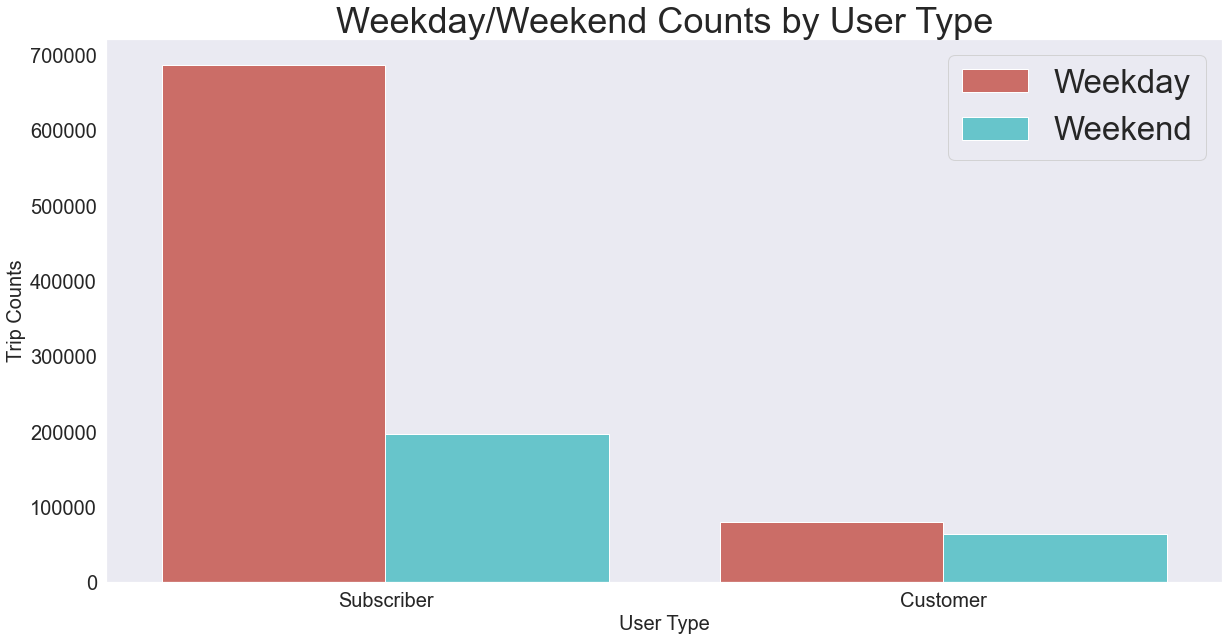

In [47]:
sns.set_theme(style="dark")
fig, ax = plt.subplots(figsize=(20,10))
sns.set(font_scale=3)
plt.title("Weekday/Weekend Counts by User Type")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.barplot(x = 'usertype', y = 'tripduration', hue = 'Isweekday', order = ['Subscriber', 'Customer'], data = user_week_count, palette = 'hls')
ax.set(xlabel = "User Type", ylabel = "Trip Counts")
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Weekday', "Weekend"])
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)
plt.show()

In [48]:
user_day = df.groupby(['usertype', 'dayofweek']).count()['tripduration'].reset_index()

In [49]:
user_day_cust = user_day[user_day['usertype'] == "Customer"]
user_day_cust

,usertype,dayofweek,tripduration
0,Customer,1,16542
1,Customer,2,15378
2,Customer,3,14610
3,Customer,4,14700
4,Customer,5,18961
5,Customer,6,35168
6,Customer,7,28384


In [50]:
user_day_sub = user_day[user_day['usertype'] == "Subscriber"]
user_day_sub

,usertype,dayofweek,tripduration
7,Subscriber,1,129752
8,Subscriber,2,142713
9,Subscriber,3,142310
10,Subscriber,4,135369
11,Subscriber,5,137098
12,Subscriber,6,105304
13,Subscriber,7,91278


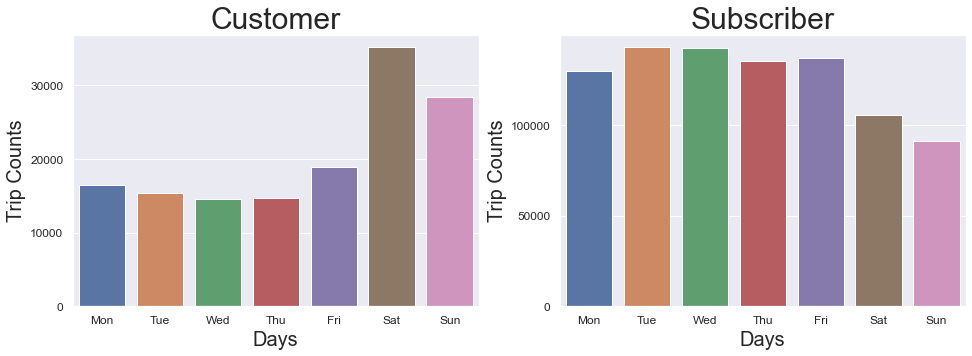

In [51]:
col_num = 2
row_num = 1
fig, axes = plt.subplots(row_num, col_num, figsize=(16, 5))

user_day_cust.columns = ['User Type', 'Days', 'Trip Counts']
user_day_cust['Days'] = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.subplot(1, 2, 1)
plt.title('Customer', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Days', 'Trip Counts',data = user_day_cust)
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)

user_day_sub.columns = ['User Type', 'Days', 'Trip Counts']
user_day_sub['Days'] = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.subplot(1, 2, 2)
plt.title('Subscriber', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Days', 'Trip Counts',data = user_day_sub)
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)
plt.show()

# Most Popular Months by User Type

In [52]:
user_month = df.groupby(['usertype', 'month']).count()['tripduration'].reset_index()

In [53]:
user_month_cust = user_month[user_month['usertype'] == "Customer"]
user_month_cust

,usertype,month,tripduration
0,Customer,1,2012
1,Customer,2,2330
2,Customer,3,5297
3,Customer,4,11524
4,Customer,5,14841
5,Customer,6,18444
6,Customer,7,18851
7,Customer,8,22361
8,Customer,9,21724
9,Customer,10,14697


In [54]:
user_month_sub = user_month[user_month['usertype'] == "Subscriber"]
user_month_sub

,usertype,month,tripduration
12,Subscriber,1,46352
13,Subscriber,2,44857
14,Subscriber,3,61100
15,Subscriber,4,76781
16,Subscriber,5,81387
17,Subscriber,6,87824
18,Subscriber,7,90193
19,Subscriber,8,94844
20,Subscriber,9,100521
21,Subscriber,10,89932


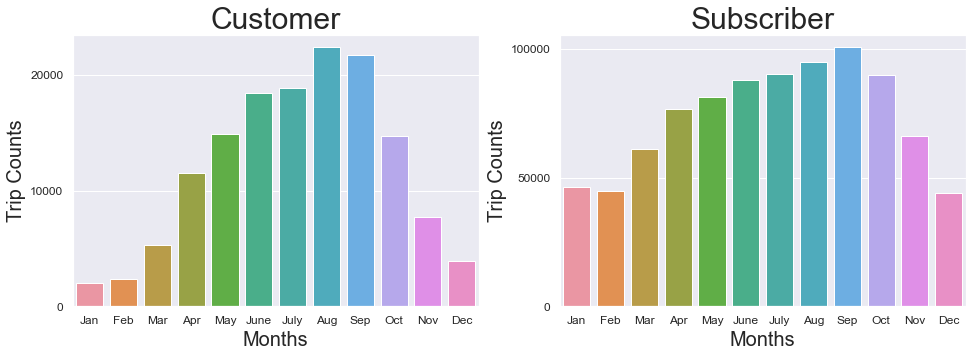

In [55]:
col_num = 2
row_num = 1
fig, axes = plt.subplots(row_num, col_num, figsize=(16, 5))

user_month_cust.columns = ['User Type', 'Months', 'Trip Counts']
user_month_cust['Months'] = ['Jan', "Feb", 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.subplot(1, 2, 1)
plt.title('Customer', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Months', 'Trip Counts',data = user_month_cust)
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)

user_month_sub.columns = ['User Type', 'Months', 'Trip Counts']
user_month_sub['Months'] = ['Jan', "Feb", 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.subplot(1, 2, 2)
plt.title('Subscriber', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('darkgrid')
ax = sns.barplot('Months', 'Trip Counts',data = user_month_sub)
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)

plt.show()